# Iris dataset classification

We use the iris dataset from scikit-learn to practice using clustering classifiers.
The iris dataset consists of measurements of several different features of three different iris flower species.

In [1]:
# import some libraries and functions we will be using
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

# import iris dataset
from sklearn.datasets import load_iris
iris = load_iris()




Lets first examine some basic properties of the iris dataset.

In [2]:
print 'Number of samples = %s'  % iris.data.shape[0]
print 'Number of features = %s' % iris.data.shape[1]

print '\n The features are:'
for name in iris.feature_names:
    print '   ' + str(name)

print '\n The flower species are:'
for i, species in enumerate(iris.target_names):
    print '  ', i, species

print ''
speciesCount = np.bincount( iris.target)
for i, species in enumerate(iris.target_names):
    print 'There are %s samples of %s.' % (speciesCount[i], species)


Number of samples = 150
Number of features = 4

 The features are:
   sepal length (cm)
   sepal width (cm)
   petal length (cm)
   petal width (cm)

 The flower species are:
   0 setosa
   1 versicolor
   2 virginica

There are 50 samples of setosa.
There are 50 samples of versicolor.
There are 50 samples of virginica.


It is important to note that the target values `[ 0, 1, 2]` in `iris.target` correspond to
the respective species names listed above.


## Data visualization

Lets take a quick look at the data before we attempt to make a classifier.

We can make scatter plots of the different features to get a quick idea for how the species compare across features.

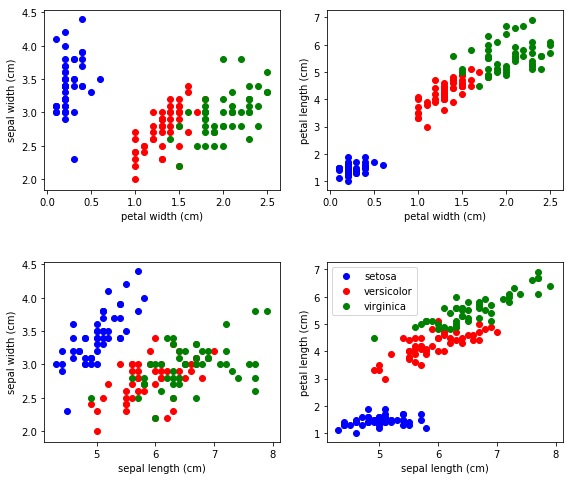

In [3]:
feature1 = [3,0]
feature2 = [1,2]

colors = ['blue', 'red', 'green']

fig = plt.figure()
fig.subplots_adjust(left=0, right=1.2, bottom=0, top=1.5, hspace=0.4, wspace=0.2)

i = 0
for x_index in feature1:
    for y_index in feature2:
        i += 1
        ax = fig.add_subplot( len(feature1), len(feature2), i)
        for label, color in zip(range(len(iris.target_names)), colors):
            ax.scatter(iris.data[iris.target==label, x_index], 
                        iris.data[iris.target==label, y_index],
                        label=iris.target_names[label],
                        c=color)

            ax.set_xlabel(iris.feature_names[x_index])
            ax.set_ylabel(iris.feature_names[y_index])

plt.legend(loc='best')
plt.show()



We can also a visual representation of the clustering of the data across all features by
plotting the features in parallel.

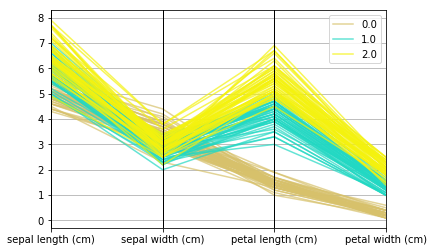

In [4]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

plt.figure()
pd.plotting.parallel_coordinates( iris_df, 'target', alpha=0.7)
plt.show()

Above, the lengend labels `[0,1,2]` corresponds to `setosa`, `versicolor`, and `virginica`. We can see that **petal length** and **petal width** seem to be the two features in which
data are most clearly clustered by species.

## Training and testing data

Since there are not that many samples (150 in total) in our dataset we will make a
stratified split of the data into training and test sets. This is done to ensure that
the training as test dataset have the same proportion of each iris species as in the
original dataset.

In [5]:
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split( x, y, train_size=0.5, random_state=123, stratify=y)

## Classifying data

We will use a **K-nearest neighbors algorithm** to classify iris species based on their features.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

In [7]:
# fit classifier using training dataset and predict test dataset classes.
clf.fit( xTrain, yTrain)
yPred = clf.predict( xTest)

In [8]:
from sklearn import metrics
print('Classification report for classifier %s:\n%s\n'
      % ( clf, metrics.classification_report( yTest, yPred)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        25
          1       0.96      0.92      0.94        25
          2       0.92      0.96      0.94        25

avg / total       0.96      0.96      0.96        75




We see that the K-nearest neighbors algorithm does a very good job at predicting the flower
species with an F1-score of 0.99, with perfect performance for class `0` corresponding to the `setosa` species.

Let's check what samples and features gave the classifier trouble.

In [9]:
idxIncorrect = np.where( yTest != yPred)[0]

print '%s samples were incorrectly predicted.' % len(idxIncorrect)

3 samples were incorrectly predicted.


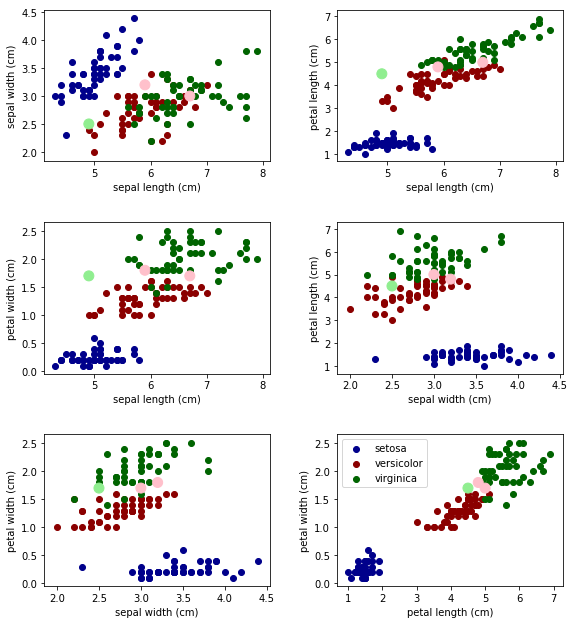

In [10]:
colorTrue  = ['darkblue', 'darkred', 'darkgreen']
colorFalse = ['lightblue', 'pink', 'lightgreen']

for i, j in enumerate(idxIncorrect):
    if yTest[j] == 0:
        colorFalse[i] = 'lightblue'
    elif yTest[j] == 1:
        colorFalse[i] = 'pink'
    else:
        colorFalse[i] = 'lightgreen'

featureList = range(4)

fig = plt.figure()
fig.subplots_adjust(left=0, right=1.2, bottom=0, top=2.0, hspace=0.4, wspace=0.3)

i = 0
for x_index in featureList:
    for y_index in range(x_index+1, 4):
        i += 1
        ax = fig.add_subplot( 3, 2, i)
        for label, color in zip(range(len(iris.target_names)), colorTrue):
            ax.scatter(iris.data[iris.target==label, x_index], 
                        iris.data[iris.target==label, y_index],
                        label=iris.target_names[label],
                        c=color)

            ax.set_xlabel(iris.feature_names[x_index])
            ax.set_ylabel(iris.feature_names[y_index])
        
        ax.scatter( xTest[idxIncorrect, x_index], xTest[idxIncorrect, y_index],
                    s=100, color=colorFalse)

plt.legend(loc='best')
plt.show()

As shown above, the samples that were incorrectly predicted lie at the interface between
clusters of `versicolor` and `virginica` samples. The incorrectly predicted samples are shown
in as larger circles with a lighter color than their correct corresponding species.

It is not surprising that the incorrectly predicted samples belong to the `versicolor` and `virginica` species. When we visualized the features in parallel it was clear that these two species had much less separation in features in comparison to `setosa`.